Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

>K-Means Clustering: A partition-based algorithm that divides data into $K$ non-overlapping subsets3. It requires the number of clusters ($K$) to be specified in advance.

>Use Case: Customer segmentation for a large retail database where the number of segments (e.g., High, Medium, Low spenders) is predetermined.

>Hierarchical Clustering: A tree-based approach (dendrogram) that builds a hierarchy of clusters either through merging (agglomerative) or splitting (divisive)6. It does not require a pre-defined number of clusters.

>Use Case: Evolutionary biology to create a phylogenetic tree showing the relationship between different species8.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.


>Answer: The Silhouette Score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

>The score ranges from -1 to +1.

>A high score indicates that the object is well-matched to its own cluster and poorly matched to neighboring clusters

>It is used to determine the quality of the clusters and can help find the optimal number of clusters.

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?


>Answer: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two main parameters:


>Eps (epsilon): The maximum distance between two samples for one to be considered as in the neighborhood of the other. If it's too small, many points will be labeled as noise; if too large, clusters will merge.


>MinPts (min_samples): The number of samples in a neighborhood for a point to be considered a core point. Higher values require denser regions to form a cluster.

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?


>Answer: Clustering algorithms like K-Means and DBSCAN are distance-based (usually Euclidean distance).

>If features have different scales (e.g., Age in years vs. Salary in thousands), the feature with the larger numerical range will dominate the distance calculation.

>Scaling (like StandardScaler) ensures all features contribute equally to the distance metric, leading to more accurate cluster formations.

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

>Answer:The Elbow Method involves running K-Means for a range of $K$ values and calculating the Within-Cluster Sum of Squares (WCSS) for each.

>As $K$ increases, WCSS decreases26.The "elbow" is the point on the plot where the rate of decrease shifts from rapid to slow.

>This point represents the optimal balance between the number of clusters and the variance explained28.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

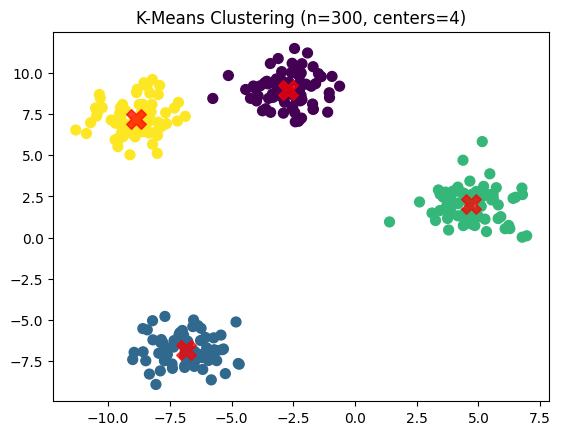

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-Means Clustering (n=300, centers=4)")
plt.show()

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).


In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Load and scale data
wine = load_wine()
X_scaled = StandardScaler().fit_transform(wine.data)

# Train DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Number of clusters (excluding noise label -1)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found (excluding noise): {n_clusters}")

Number of clusters found (excluding noise): 1


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.


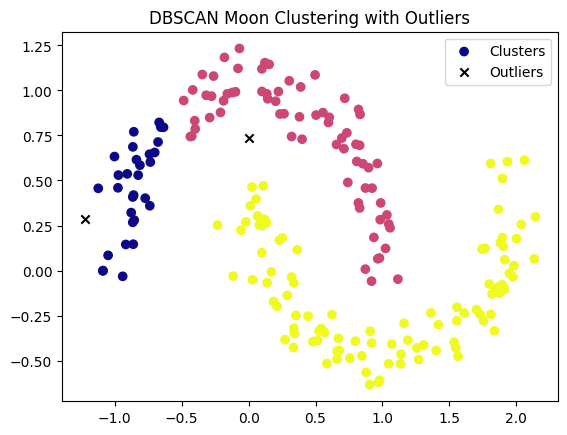

In [6]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generate data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize
plt.scatter(X[labels != -1, 0], X[labels != -1, 1], c=labels[labels != -1], cmap='plasma', label='Clusters')
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='black', marker='x', label='Outliers')
plt.legend()
plt.title("DBSCAN Moon Clustering with Outliers")
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

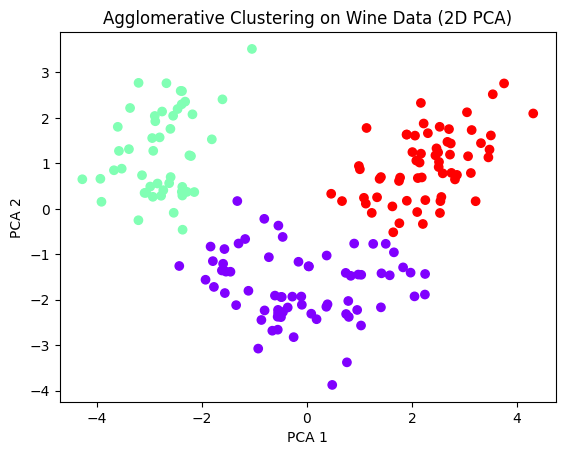

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Preprocess and Reduce Dimensions
wine = load_wine()
X_scaled = StandardScaler().fit_transform(wine.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
labels = agg_clust.fit_predict(X_pca)

# Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title("Agglomerative Clustering on Wine Data (2D PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

>Workflow Description:


>Algorithm Selection: I would use K-Means for general behavioral segments because it is efficient for large datasets, or DBSCAN if the purchase patterns show irregular, non-spherical shapes (e.g., identifying niche "whale" shoppers).


>Preprocessing:


>Missing Values: Use median imputation for numerical data or drop rows with critical missing purchase history.


>Scaling: Apply StandardScaler so that "Total Spend" (large numbers) doesn't outweigh "Frequency of Purchase" (small numbers).


>Determining Clusters: Use the Elbow Method (WCSS) and verify with the Silhouette Score to ensure distinct, non-overlapping segments.

>Marketing Benefit: The team can create personalized email campaigns. For example, a "Loyal High-Spenders" segment could receive early access to new products, while a "Lapsed Customers" segment receives discount codes to encourage re-engagement.